In [32]:
import pandas as pd

def check_missing_values(df):

    missing_values = df.isnull().sum()
    missing_columns = missing_values[missing_values > 0]
    print("Coloanele cu valori lipsă:", missing_columns.index.tolist())
    return missing_columns


if __name__ == "__main__":
    file_path = "ev_charging_patterns_filled.csv"
    df = pd.read_csv(file_path)
    print("Valori lipsă în setul de date:")
    print(check_missing_values(df))
    


Valori lipsă în setul de date:
Coloanele cu valori lipsă: []
Series([], dtype: int64)


In [34]:
#aici au fost eliminate si inlocuite valorile lipsa sau NaN

In [35]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Încarcă dataset-ul (presupunând că ai un fișier CSV inițial)
df = pd.read_csv("ev_charging_patterns_filled_clean.csv")

# 1. One-Hot Encoding pentru variabile nominale
categorical_cols = ['Vehicle Model', 'Charging Station Location', 'Charger Type', 'User Type']
encoder = OneHotEncoder(sparse_output=False)  # Fără drop='first'
encoded_data = encoder.fit_transform(df[categorical_cols])

# Convertim în DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Eliminăm coloanele originale și adăugăm noile coloane encodate
df = df.drop(columns=categorical_cols).join(encoded_df)
df['Charging Start Time']= pd.to_datetime(df['Charging Start Time'])
df['Charging End Time']= pd.to_datetime(df['Charging End Time'])
# 2. Ordinal Encoding pentru variabile ordinale
ordinal_cols = ['Time of Day', 'Day of Week']
ordinal_mapping = {
    'Time of Day': ['Morning', 'Afternoon', 'Evening', 'Night'],
    'Day of Week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
}

ordinal_encoder = OrdinalEncoder(categories=[ordinal_mapping[col] for col in ordinal_cols])
df[ordinal_cols] = ordinal_encoder.fit_transform(df[ordinal_cols])


# Salvăm dataset-ul preprocesat înainte de standardizare
df.to_csv("ev_charging_patterns_data_encoded.csv", index=False)

print("Fișier salvat: ev_charging_patterns_data_encoded.csv")


Fișier salvat: ev_charging_patterns_data_encoded.csv


In [36]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Încărcăm dataset-ul preprocesat anterior
df = pd.read_csv("ev_charging_patterns_data_encoded.csv")

# Identificăm și eliminăm coloanele non-numerice
# non_numeric_cols = df.select_dtypes(include=['object']).columns
# df_numeric = df.drop(columns=non_numeric_cols, errors='ignore')
column_for_scaling= ['Energy Consumed (kWh)', 'Charging Duration (hours)',
                    'Charging Rate (kW)', 'Charging Cost (USD)',
                    'State of Charge (Start %)', 'State of Charge (End %)',
                    'Distance Driven (since last charge) (km)', 'Temperature (°C)',
                    'Vehicle Age (years)']
# Aplicăm StandardScaler pe toate coloanele numerice
scaler = StandardScaler()
df[column_for_scaling] = scaler.fit_transform(df[column_for_scaling])



# Salvăm rezultatul într-un nou fișier CSV
df.to_csv("ev_charging_patterns_scaled.csv", index=False)

print("Fișier salvat: ev_charging_patterns_scaled.csv")


Fișier salvat: ev_charging_patterns_scaled.csv


In [37]:
import pandas as pd

# Load the dataset
#df = pd.read_csv("ev_charging_patterns_scaled.csv")
df=pd.read_csv("ev_charging_patterns_data_encoded.csv")
# Check data types
print(df.dtypes)

# Find non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns
#print("Non-numeric columns:", non_numeric_cols)
print(df.head())

User ID                                      object
Battery Capacity (kWh)                      float64
Charging Station ID                          object
Charging Start Time                          object
Charging End Time                            object
Energy Consumed (kWh)                       float64
Charging Duration (hours)                   float64
Charging Rate (kW)                          float64
Charging Cost (USD)                         float64
Time of Day                                 float64
Day of Week                                 float64
State of Charge (Start %)                   float64
State of Charge (End %)                     float64
Distance Driven (since last charge) (km)    float64
Temperature (°C)                            float64
Vehicle Age (years)                         float64
Vehicle Model_BMW i3                        float64
Vehicle Model_Chevy Bolt                    float64
Vehicle Model_Hyundai Kona                  float64
Vehicle Mode

   Battery Capacity (kWh)  Energy Consumed (kWh)  Charging Duration (hours)  \
0              108.463007              60.712346                   0.591363   
1              100.000000              34.256453                   3.065585   
2               75.000000              16.561064                   3.590966   
3               97.681812              24.726938                   3.458680   
4               50.000000              23.824040                   0.848218   

   Charging Rate (kW)  Charging Cost (USD)  Time of Day  Day of Week  \
0           36.389181            13.087717          2.0          1.0   
1            5.523689            10.972136          1.0          0.0   
2           19.769099            37.441857          0.0          4.0   
3           49.402739            17.494808          2.0          3.0   
4            6.614280             6.430589          2.0          4.0   

   State of Charge (Start %)  State of Charge (End %)  \
0                  29.371576       

C:\Users\adelg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


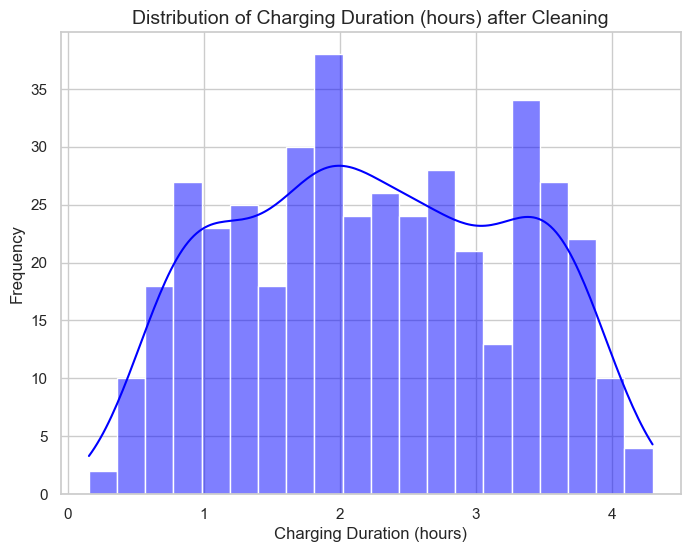

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
##ev_data=df
df=pd.read_csv("updated_ev_charging_data.csv")
df_valid=df
df_valid=df[(df['Charging Duration (hours)']>0)& (df['Charging Duration (hours)']<=5)].copy()
if 'Vehicle Model' in df_valid.columns:
    vehicle_model_cl=df_valid['Vehicle Model']
else:
    vehicle_cls=[col for col in df_valid.columns if 'Vehicle Model' in col]
    df_valid.loc[:, 'Vehicle Model']=df_valid[vehicle_cls].idxmax(axis=1).str.replace('Vehicle Model_', '')
    vehicle_model_cl = df_valid['Vehicle Model']


print(df_valid.head())
plt.figure(figsize=(8,6))
sns.histplot(df_valid['Charging Duration (hours)'], bins=20, kde=True, color='blue')
plt.title('Distribution of Charging Duration (hours) after Cleaning', fontsize=14)
plt.xlabel('Charging Duration (hours)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [88]:


# Definește intervalele valide
valid_ranges = {
    "Level 1": (0.5, 2),
    "Level 2": (3, 22),
    "DC Fast Charger": (22, 350)
}

# Funcția de validare pe baza one-hot encoding
def is_valid(row):
    rate = row['Charging Rate (kW)']
    
    for charger_type, (min_val, max_val) in valid_ranges.items():
        col_name = f"Charger Type_{charger_type}"
        if col_name in row and row[col_name] == 1.0:
            return min_val <= rate <= max_val
    
    return False

# Aplică filtrul
df_valid = df_valid[df_valid.apply(is_valid, axis=1)]

# Media Charging Rate per tip de charger (one-hot encoded)
df_valid.groupby(df_valid.filter(like='Charger Type').columns.tolist())['Charging Rate (kW)'].mean()



,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),...,User Type_Long-Distance Traveler,Charging Efficiency (kWh/h),Energy per Charge %,Distance per kWh,Total Charge Gained,Charger Efficiency,Temperature Adjusted Consumption,Vehicle Model,Charger Type,Charging Rate Valid
0,108.463007,60.712346,0.591363,36.389181,13.087717,2.0,1.0,29.371576,86.119962,293.602111,...,0.0,102.665033,1.069851,4.835954,56.748386,61.534378,84.839289,BMW i3,DC Fast Charger,1
1,100.000000,34.256453,3.065585,5.523689,10.972136,1.0,0.0,19.205447,51.626483,249.127597,...,0.0,11.174525,1.056612,7.272428,32.421036,1.801838,40.530463,Hyundai Kona,Level 2,1
2,75.000000,16.561064,3.590966,19.769099,37.441857,0.0,4.0,25.775415,69.201229,159.231610,...,0.0,4.611869,0.381365,9.614817,43.425814,5.505232,28.245184,Nissan Leaf,Level 2,1
3,97.681812,24.726938,3.458680,49.402739,17.494808,2.0,3.0,67.591971,89.942229,237.306421,...,0.0,7.149241,1.106338,9.597081,22.350258,14.283696,43.994996,BMW i3,DC Fast Charger,1
4,50.000000,23.824040,0.848218,6.614280,6.430589,2.0,4.0,57.595195,74.961950,22.006829,...,0.0,28.087158,1.371819,0.923724,17.366755,7.797852,25.723163,Hyundai Kona,Level 2,1


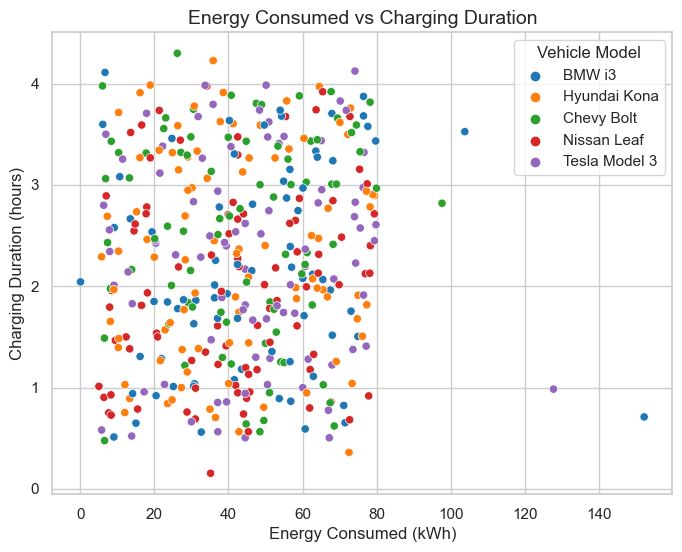

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_valid['Energy Consumed (kWh)'], y=df_valid['Charging Duration (hours)'], hue=vehicle_model_cl, palette='tab10')
plt.title('Energy Consumed vs Charging Duration', fontsize=14)
plt.xlabel('Energy Consumed (kWh)')
plt.ylabel('Charging Duration (hours)')
plt.grid(True)
plt.show()

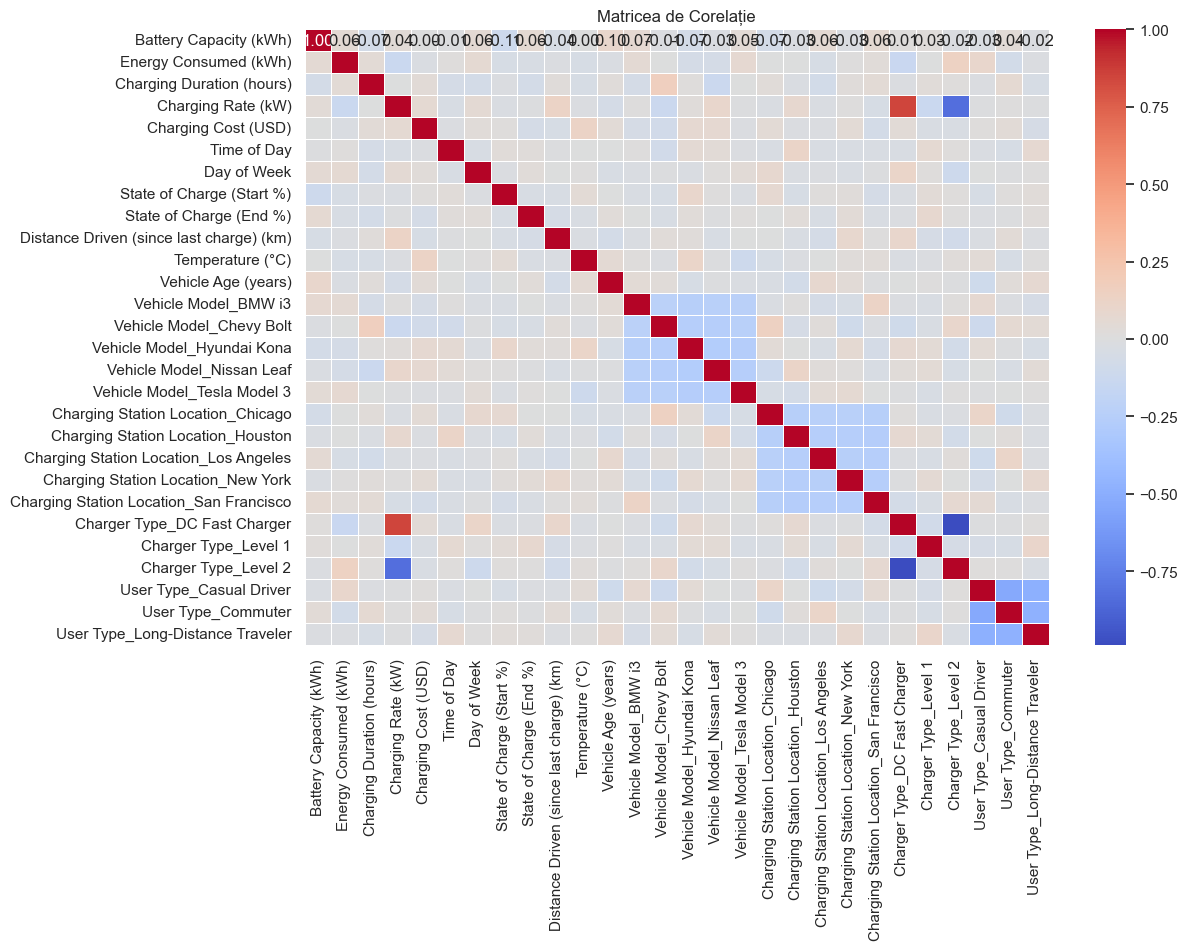

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Încărcăm setul de date standardizat
df_scaled = pd.read_csv("ev_charging_patterns_scaled.csv")
df_numeric_only = df_scaled.select_dtypes(exclude=['object', 'category', 'bool'])

# Calculăm matricea de corelație
correlation_matrix = df_numeric_only.corr()

# 2. Vizualizarea Matricei de Corelație
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matricea de Corelație")
plt.show()


In [57]:
import numpy as np
df_valid['Charging Efficiency (kWh/h)'] = df_valid['Energy Consumed (kWh)'] / df_valid['Charging Duration (hours)']

df_valid['Energy per Charge %'] = df_valid['Energy Consumed (kWh)'] / \
                                    (df_valid['State of Charge (End %)'] - df_valid['State of Charge (Start %)'])

df_valid['Distance per kWh'] = df_valid['Distance Driven (since last charge) (km)'] / df_valid['Energy Consumed (kWh)']

df_valid['Total Charge Gained'] = df_valid['State of Charge (End %)'] - df_valid['State of Charge (Start %)']

df_valid['Charger Efficiency'] = df_valid['Charging Rate (kW)'] / df_valid['Charging Duration (hours)']

# Handle division by zero or infinity values
df_valid.replace([np.inf, -np.inf], np.nan, inplace=True)
df_valid.fillna(0, inplace=True)  # Replace NaN or infinity with 0 for simplicity

# For Temperature Adjusted Consumption, assuming 20°C as the "average" comfortable temperature for EVs
average_temperature = 20
df_valid['Temperature Adjusted Consumption'] = df_valid['Energy Consumed (kWh)'] * \
                                                 (1 + abs(df_valid['Temperature (°C)'] - average_temperature) / average_temperature)

# Check if new features are added
df_valid.head()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),...,User Type_Commuter,User Type_Long-Distance Traveler,Charging Efficiency (kWh/h),Energy per Charge %,Distance per kWh,Total Charge Gained,Charger Efficiency,Temperature Adjusted Consumption,Vehicle Model,Charger Type
0,108.463007,60.712346,0.591363,36.389181,13.087717,2.0,1.0,29.371576,86.119962,293.602111,...,1.0,0.0,102.665033,1.069851,4.835954,56.748386,61.534378,84.839289,BMW i3,DC Fast Charger
12,100.000000,34.256453,3.065585,5.523689,10.972136,1.0,0.0,19.205447,51.626483,249.127597,...,0.0,0.0,11.174525,1.056612,7.272428,32.421036,1.801838,40.530463,Hyundai Kona,Level 2
13,75.000000,16.561064,3.590966,19.769099,37.441857,0.0,4.0,25.775415,69.201229,159.231610,...,1.0,0.0,4.611869,0.381365,9.614817,43.425814,5.505232,28.245184,Nissan Leaf,Level 2
16,97.681812,24.726938,3.458680,49.402739,17.494808,2.0,3.0,67.591971,89.942229,237.306421,...,1.0,0.0,7.149241,1.106338,9.597081,22.350258,14.283696,43.994996,BMW i3,DC Fast Charger
17,50.000000,23.824040,0.848218,6.614280,6.430589,2.0,4.0,57.595195,74.961950,22.006829,...,0.0,0.0,28.087158,1.371819,0.923724,17.366755,7.797852,25.723163,Hyundai Kona,Level 2


<Axes: xlabel='Charger Type', ylabel='Charging Rate (kW)'>

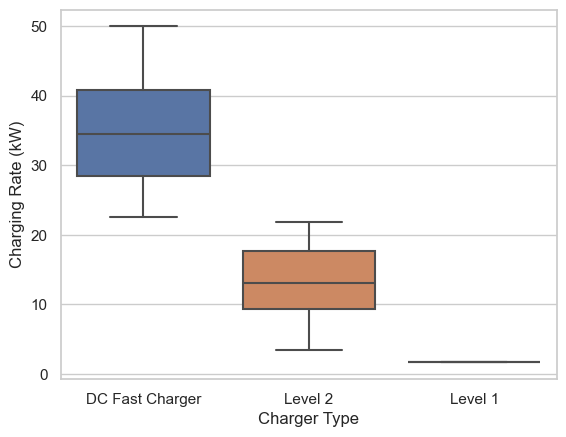

In [60]:
df_valid.groupby(df_valid.filter(like='Charger Type').columns.tolist())['Charging Rate (kW)'].mean()
sns.boxplot(x='Charger Type', y='Charging Rate (kW)', data=df_valid)

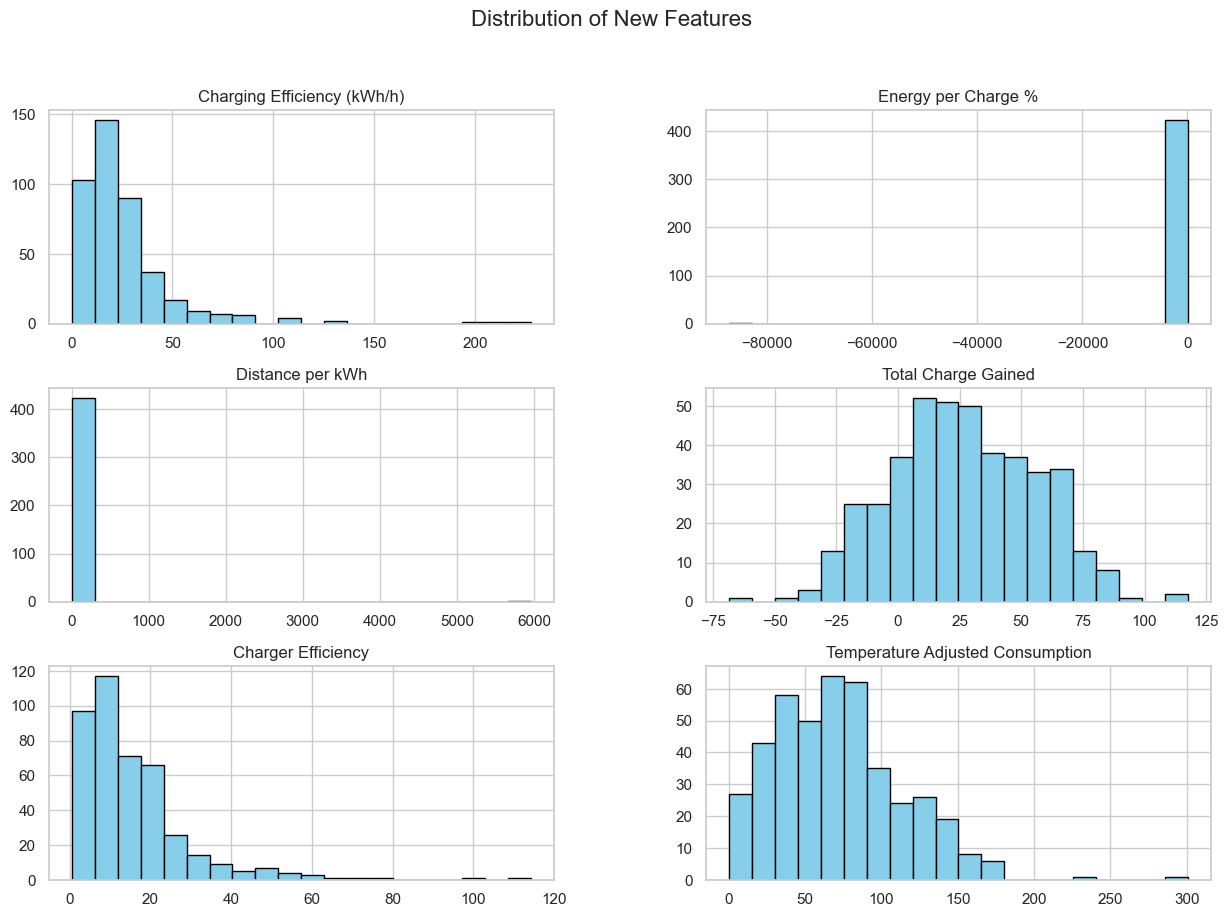

In [59]:
import matplotlib.pyplot as plt
new_features=  ['Charging Efficiency (kWh/h)', 'Energy per Charge %',
                'Distance per kWh', 'Total Charge Gained',
                'Charger Efficiency', 'Temperature Adjusted Consumption']

# Plot histograms for new features
df_valid[new_features].hist(bins=20, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of New Features', fontsize=16)
plt.show()

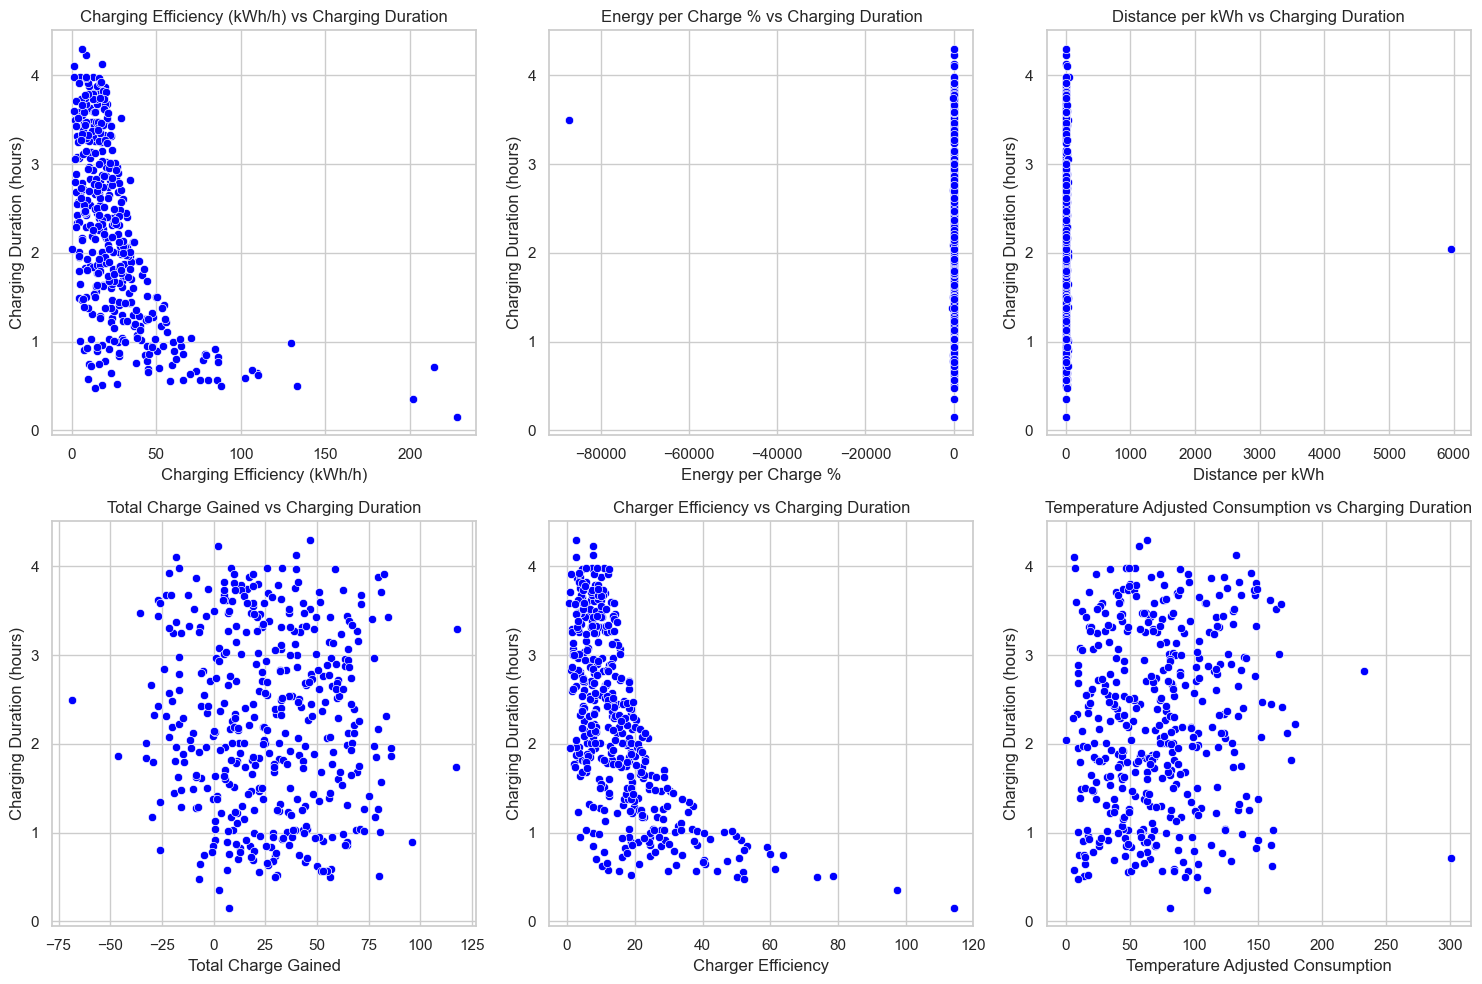

In [61]:
#########Relationships between new features and Charging Duration
plt.figure(figsize=(15,10))

for i, feature in enumerate(new_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df_valid[feature], y=df_valid['Charging Duration (hours)'], color='blue')
    plt.title(f'{feature} vs Charging Duration', fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('Charging Duration (hours)')

plt.tight_layout()
plt.show()

In [16]:
# Salvăm rezultatul într-un nou fișier CSV
df_scaled.to_csv("ev_charging_patterns_scaled.csv", index=False)

print("Fișier salvat: ev_charging_patterns_scaled.csv")


Fișier salvat: ev_charging_patterns_scaled.csv


Valorile matricei de corelație:
                                  Battery Capacity (kWh)  Charging Rate (kW)  \
Battery Capacity (kWh)                          1.000000            0.044006   
Charging Rate (kW)                              0.044006            1.000000   
Energy Consumed (kWh)                           0.054103           -0.126659   
State of Charge (Start %)                      -0.107641           -0.027872   
State of Charge (End %)                         0.066598           -0.005579   
Vehicle Age (years)                             0.091094           -0.054951   
Temperature (°C)                                0.009049           -0.025281   
Charging Efficiency (kWh/h)                     0.090267           -0.056354   
Energy per Charge %                            -0.067372            0.044001   
Distance per kWh                                0.059627           -0.075467   
Total Charge Gained                             0.123981            0.019546   
Charger 

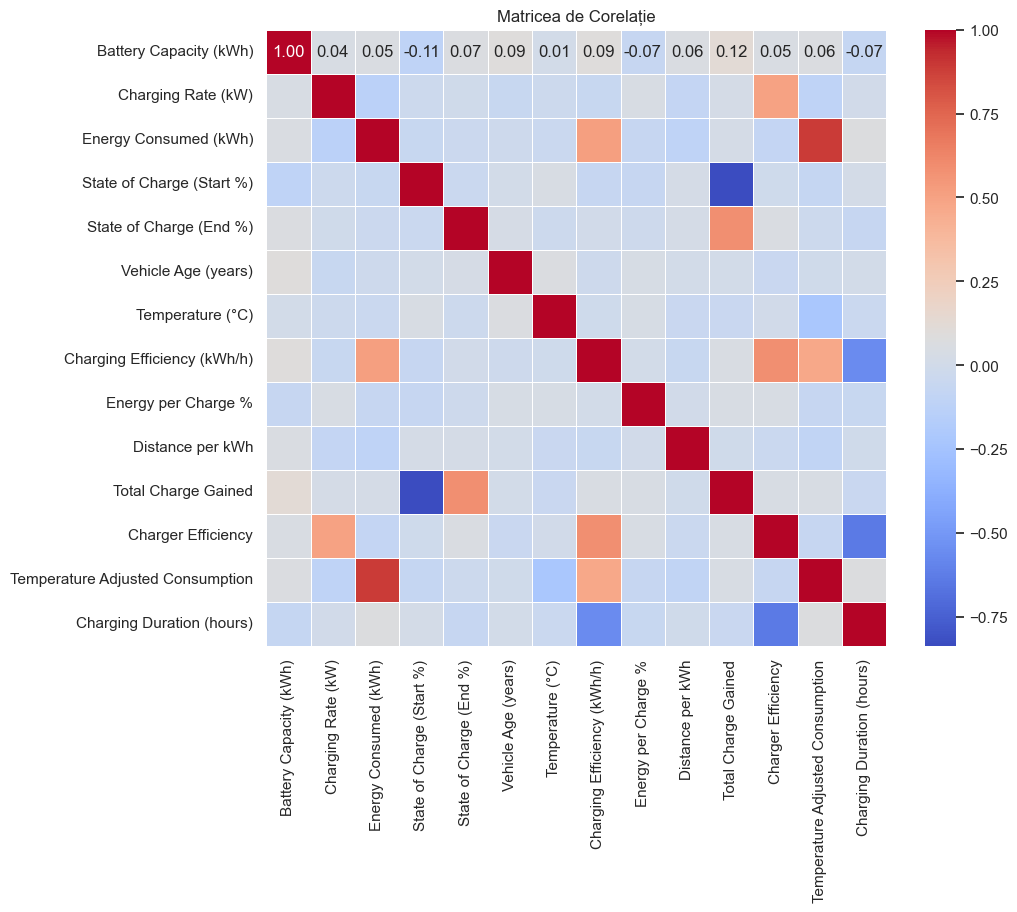

In [62]:
#feature engineering


engineered_features = df_valid[['Battery Capacity (kWh)', 'Charging Rate (kW)',
                                  'Energy Consumed (kWh)', 'State of Charge (Start %)',
                                  'State of Charge (End %)', 'Vehicle Age (years)',
                                  'Temperature (°C)', 'Charging Efficiency (kWh/h)',
                                  'Energy per Charge %', 'Distance per kWh',
                                  'Total Charge Gained', 'Charger Efficiency',
                                  'Temperature Adjusted Consumption', 'Charging Duration (hours)']]

# Compute correlation matrix
corr_matrix_feat_engine = engineered_features.corr()
print("Valorile matricei de corelație:")
print(corr_matrix_feat_engine)
# Plot correlation heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_feat_engine, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matricea de Corelație")
plt.show()




In [64]:
# Adding the new features
df_valid['Charging Efficiency (kWh/h)'] = df_valid['Energy Consumed (kWh)'] / df_valid['Charging Duration (hours)']

df_valid['Energy per Charge %'] = df_valid['Energy Consumed (kWh)'] / \
                                    (df_valid['State of Charge (End %)'] - df_valid['State of Charge (Start %)'])

df_valid['Distance per kWh'] = df_valid['Distance Driven (since last charge) (km)'] / df_valid['Energy Consumed (kWh)']

df_valid['Total Charge Gained'] = df_valid['State of Charge (End %)'] - df_valid['State of Charge (Start %)']

df_valid['Charger Efficiency'] = df_valid['Charging Rate (kW)'] / df_valid['Charging Duration (hours)']

# Handle possible division by zero or NaN values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)

# For Temperature Adjusted Consumption, assuming 20°C as a reference temperature
average_temperature = 20
df_valid['Temperature Adjusted Consumption'] = df_valid['Energy Consumed (kWh)'] * \
                                                 (1 + abs(df_valid['Temperature (°C)'] - average_temperature) / average_temperature)

# Ensure that the new features were added
print(df_valid.head())
df_valid.groupby(df_valid.filter(like='Charger Type').columns.tolist())['Charging Rate (kW)'].mean()

    Battery Capacity (kWh)  Energy Consumed (kWh)  Charging Duration (hours)  \
0               108.463007              60.712346                   0.591363   
12              100.000000              34.256453                   3.065585   
13               75.000000              16.561064                   3.590966   
16               97.681812              24.726938                   3.458680   
17               50.000000              23.824040                   0.848218   

    Charging Rate (kW)  Charging Cost (USD)  Time of Day  Day of Week  \
0            36.389181            13.087717          2.0          1.0   
12            5.523689            10.972136          1.0          0.0   
13           19.769099            37.441857          0.0          4.0   
16           49.402739            17.494808          2.0          3.0   
17            6.614280             6.430589          2.0          4.0   

    State of Charge (Start %)  State of Charge (End %)  \
0                   29

Charger Type_DC Fast Charger  Charger Type_Level 1  Charger Type_Level 2  Charger Type   
0.0                           0.0                   1.0                   Level 2            13.073863
                              1.0                   0.0                   Level 1             1.688617
1.0                           0.0                   0.0                   DC Fast Charger    34.987900
Name: Charging Rate (kW), dtype: float64

In [67]:
df_valid.to_csv('updated_ev_charging_data.csv', index=False)
numeric_df = df_valid.select_dtypes(include='number')

print(numeric_df.head())

   Battery Capacity (kWh)  Energy Consumed (kWh)  Charging Duration (hours)  \
0              108.463007              60.712346                   0.591363   
1              100.000000              34.256453                   3.065585   
2               75.000000              16.561064                   3.590966   
3               97.681812              24.726938                   3.458680   
4               50.000000              23.824040                   0.848218   

   Charging Rate (kW)  Charging Cost (USD)  Time of Day  Day of Week  \
0           36.389181            13.087717          2.0          1.0   
1            5.523689            10.972136          1.0          0.0   
2           19.769099            37.441857          0.0          4.0   
3           49.402739            17.494808          2.0          3.0   
4            6.614280             6.430589          2.0          4.0   

   State of Charge (Start %)  State of Charge (End %)  \
0                  29.371576       

In [20]:
from sklearn.model_selection import train_test_split


# Drop irrelevant columns (User ID and Charging Station ID may not be useful for prediction)
#df = df.drop(columns=['User ID', 'Charging Station ID'])

# One-hot encode categorical columns (e.g., Time of Day, Day of Week, Charging Start Day)
#df = pd.get_dummies(df, columns=['Time of Day', 'Day of Week'], drop_first=True)
df=numeric_df
# Ensure all other columns are numerical
print(df.dtypes)  # Check the data types to ensure all features are numeric

# Now we can proceed with Train-Test Split
X = df.drop(columns=['Charging Duration (hours)'])  # Drop non-predictive columns
y = df_valid['Charging Duration (hours)']  # This is our target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)  # Check the shape of the data

Battery Capacity (kWh)                      float64
Energy Consumed (kWh)                       float64
Charging Duration (hours)                   float64
Charging Rate (kW)                          float64
Charging Cost (USD)                         float64
Time of Day                                 float64
Day of Week                                 float64
State of Charge (Start %)                   float64
State of Charge (End %)                     float64
Distance Driven (since last charge) (km)    float64
Temperature (°C)                            float64
Vehicle Age (years)                         float64
Vehicle Model_BMW i3                        float64
Vehicle Model_Chevy Bolt                    float64
Vehicle Model_Hyundai Kona                  float64
Vehicle Model_Nissan Leaf                   float64
Vehicle Model_Tesla Model 3                 float64
Charging Station Location_Chicago           float64
Charging Station Location_Houston           float64
Charging Sta

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as root_mean_squared_error

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rmse_rf = root_mean_squared_error(y_test, y_pred_rf, squared=False)
print(f'Random Forest RMSE: {rmse_rf}')

Random Forest RMSE: 0.3062920980795869


C:\Users\adelg\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


C:\Users\adelg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


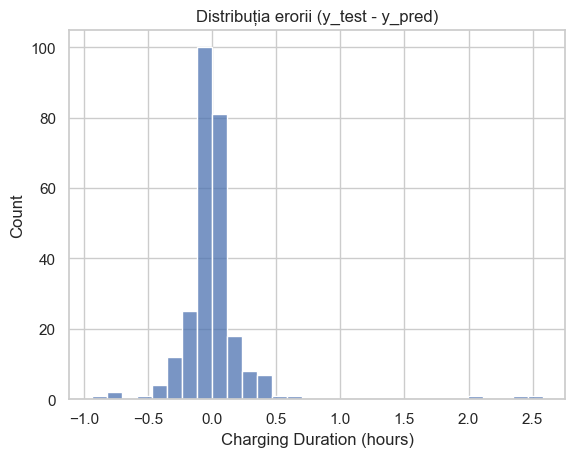

In [22]:
sns.histplot(y_test - y_pred_rf, bins=30)
plt.title("Distribuția erorii (y_test - y_pred)")
plt.show()


In [23]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE directly

rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)  

# Alternatively, use the new method (for future compatibility)
from sklearn.metrics import mean_squared_error as root_mean_squared_error

rmse_rf = root_mean_squared_error(y_test, y_pred_rf)


print(f'Random Forest RMSE: {rmse_rf}')
from sklearn.metrics import mean_absolute_error, r2_score

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE: {mae_rf:.2f} ore")
print(f"R²: {r2_rf:.4f}")


Random Forest RMSE: 0.0938148493459953
MAE: 0.14 ore
R²: 0.9189


C:\Users\adelg\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


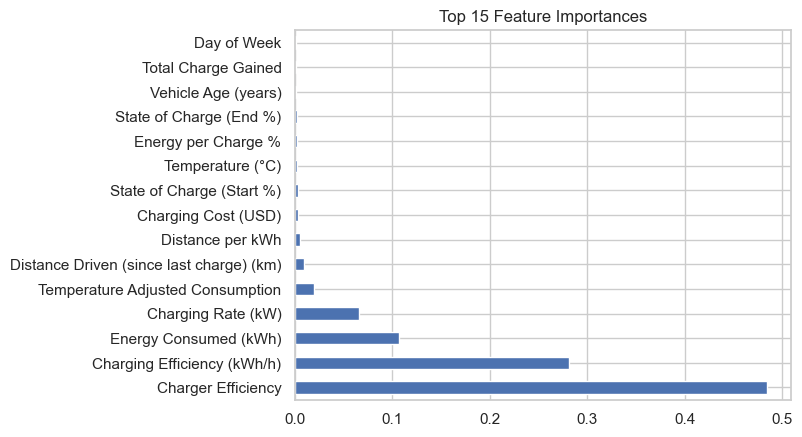

CV RMSE Mean: 0.273, Std: 0.069
p-value: 3.022315856075512e-66
Număr outliere: 3
      Charging Duration (hours)  Charging Rate (kW)  \
903                    5.673789           26.546824   
772                    6.759152           43.120403   
1032                   7.635145           10.446146   

      State of Charge (Start %)  State of Charge (End %)  \
903                   65.993502               140.383048   
772                   71.933351                57.051504   
1032                   7.174271               101.844422   

      Distance Driven (since last charge) (km)  Vehicle Age (years)  \
903                                 151.079811                  1.0   
772                                  14.590879                  2.0   
1032                                226.394895                  2.0   

      Temperature (°C)  
903          25.068745  
772          -8.630011  
1032         32.882702  
Skewness: 4.8128
Kurtosis: 36.8939


In [24]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importances.nlargest(15).plot(kind='barh')
plt.title('Top 15 Feature Importances')
plt.show()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"CV RMSE Mean: {-scores.mean():.3f}, Std: {scores.std():.3f}")
from scipy.stats import normaltest
error = y_test - y_pred_rf
stat, p = normaltest(error)
print(f"p-value: {p}")
outliers = error[abs(error) > 2]
print(f"Număr outliere: {len(outliers)}")
outlier_indices = error[abs(error) > 2].index
df_outliers = df.loc[outlier_indices]
print(df_outliers[['Charging Duration (hours)', 'Charging Rate (kW)', 
                   'State of Charge (Start %)', 'State of Charge (End %)', 
                   'Distance Driven (since last charge) (km)', 
                   'Vehicle Age (years)', 'Temperature (°C)']])
from scipy.stats import skew, kurtosis
print(f"Skewness: {skew(error):.4f}")
print(f"Kurtosis: {kurtosis(error):.4f}")


✅ Modelul și feature-urile au fost salvate cu succes!


C:\Users\adelg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Charger Type_DC Fast Charger  Charger Type_Level 1  Charger Type_Level 2
0.0                           0.0                   1.0                     13.073863
                              1.0                   0.0                      1.688617
1.0                           0.0                   0.0                     34.987900
Name: Charging Rate (kW), dtype: float64
Cross-validation R² scores: [0.92098385 0.87875036 0.86165523 0.88545699 0.86453343]
Mean Squared Error: 0.3454
R-squared: 0.6965
Accuracy: 69.65%
(RandomForestRegressor(max_depth=30, max_features='sqrt', random_state=40), Index(['Battery Capacity (kWh)', 'Energy Consumed (kWh)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Vehicle Model_BMW i3',
       'Vehicle Model_Chevy Bolt', 'Vehicle Model_Hyundai Kona',
       'Vehi

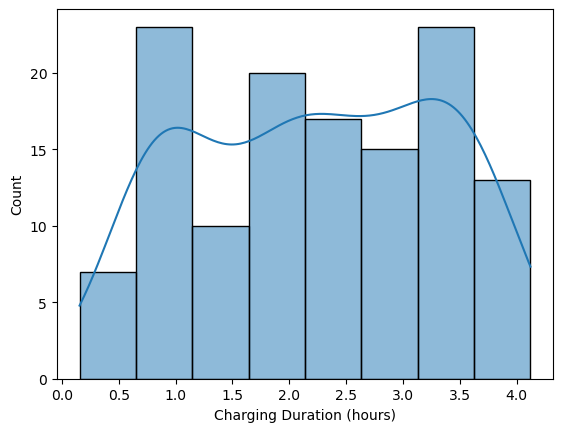

In [10]:
import pandas as pd
import os
import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def train_rf_model(data_path):
    # Încarcă datasetul
    df = pd.read_csv(data_path)
    
    # Selectează caracteristicile numerice
    # features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    # features = [col for col in features if col != 'Charging Duration (hours)']
    


    #exclude_cols = ['User ID', 'Charging Station ID', 'Charging Start Time', 'Charging End Time', 'Charging Duration (hours)']
    X = df.drop(columns=[
    'Charging Duration (hours)',
    'Charger Type_DC Fast Charger',
    'Charger Type_Level 1',
    'Charger Type_Level 2'
    ])
    y = df['Charging Duration (hours)']


    # Împărțim datele în seturi de antrenament și test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
    
    # Creează și antrenează modelul
    ################ Grid Search
    # rf = RandomForestRegressor( #### acesti hiperparametri gasiti cu grid search {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
    # max_depth=20,
    # max_features='sqrt',
    # min_samples_leaf=1,
    # min_samples_split=10,
    # n_estimators=50,
    # random_state=40
    # )

    ############ Algoritm Genetic
    rf = RandomForestRegressor( ##{'n_estimators': 100, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
    max_depth=30,
    max_features='sqrt',    
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=40
    )
   
    
    rf.fit(X_train, y_train)

    # Căi fișiere salvate
    model_path = "rf_charging_duration_model.pkl"
    features_path = "rf_model_features.pkl"

    # Salvează modelul și features
    joblib.dump(rf, model_path)
    joblib.dump(X.columns.tolist(), features_path)

    # Verificare salvare
    if os.path.exists(model_path) and os.path.exists(features_path):
        print("✅ Modelul și feature-urile au fost salvate cu succes!")
    else:
        print("⚠️ Eroare: Fișierele nu au fost salvate corect.")
    # Predicție
    y_pred = rf.predict(X_test)
    import seaborn as sns
    sns.histplot(y_test, kde=True)


    # Evaluează performanța
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = max(0, r2) * 100  
    
    from sklearn.model_selection import cross_val_score

    scores = cross_val_score(RandomForestRegressor( n_estimators=50,         # Reduce numărul de arbori
    max_depth=10,            # Limitează adâncimea arborilor
    min_samples_split=10,    # Crește numărul minim de mostre per split
    random_state=42), X, y, cv=5, scoring="r2")
    correlation = df.corr(numeric_only=True)['Charging Duration (hours)'].sort_values(ascending=False)
    # print(correlation)
    print(df.groupby(df.filter(like='Charger Type').columns.tolist())['Charging Rate (kW)'].mean())
    print(f"Cross-validation R² scores: {scores}")
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'R-squared: {r2:.4f}')
    print(f'Accuracy: {accuracy:.2f}%')

    return rf, X.columns

# Exemplu de apel:
#results = train_rf_model("ev_charging_patterns_data_encoded.csv")
results = train_rf_model("updated_ev_charging_data.csv")

print(results)


In [3]:
import pandas as pd

df = pd.read_csv("updated_ev_charging_data.csv")
df.groupby(df.filter(like='Charger Type').columns.tolist())['Charging Rate (kW)'].nunique()


Charger Type_DC Fast Charger  Charger Type_Level 1  Charger Type_Level 2
0.0                           0.0                   1.0                     171
                              1.0                   0.0                       2
1.0                           0.0                   0.0                     235
Name: Charging Rate (kW), dtype: int64

In [6]:
df.filter(like="Charger Type").sum()


Charger Type_DC Fast Charger    251.0
Charger Type_Level 1              2.0
Charger Type_Level 2            171.0
dtype: float64

In [103]:
# import pandas as pd
# import numpy as np
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score

# def predict_charging_duration(model, feature_names, input_data):
#     # Transformă datele de intrare într-un DataFrame
#     input_df = pd.DataFrame([input_data])
#     input_df = input_df.reindex(columns=feature_names, fill_value=0)

    
#     # Prezice durata de încărcare
#     return model.predict(input_df)[0]

# # Exemplu de utilizare:
# #model, feature_names = train_rf_model("expanded_ev_charging_patterns_data_encoded.csv")
# model, feature_names = train_rf_model("updated_ev_charging_data.csv")
# test_input = {
#    "Battery Capacity (kWh)": 50.0,
#     "Energy Consumed (kWh)": 23.824040473705303,
#     "Charging Rate (kW)": 34,
#     "Charging Cost (USD)": 6.430589211997161,
#     "Time of Day": 2.0,
#     "Day of Week": 4.0,
#     "State of Charge (Start %)": 57.59519511951953,
#     "State of Charge (End %)": 74.96195034708379,
#     "Distance Driven (since last charge) (km)": 22.00682916343814,
#     "Temperature (°C)": 18.40570905025936,
#     "Vehicle Age (years)": 6.0,

#     # One-hot encoded vehicle model
#     "Vehicle Model_BMW i3": 0.0,
#     "Vehicle Model_Chevy Bolt": 0.0,
#     "Vehicle Model_Hyundai Kona": 1.0,
#     "Vehicle Model_Nissan Leaf": 0.0,
#     "Vehicle Model_Tesla Model 3": 0.0,

#     # One-hot encoded station location
#     "Charging Station Location_Chicago": 0.0,
#     "Charging Station Location_Houston": 1.0,
#     "Charging Station Location_Los Angeles": 0.0,
#     "Charging Station Location_New York": 0.0,
#     "Charging Station Location_San Francisco": 0.0,

#     # One-hot encoded charger type
#     # "Charger Type_DC Fast Charger": 1.0,
#     # "Charger Type_Level 1": 0.0,
#     # "Charger Type_Level 2": 0.0,

#     # One-hot encoded user type
#     "User Type_Casual Driver": 1.0,
#     "User Type_Commuter": 0.0,
#     "User Type_Long-Distance Traveler": 0.0,

#     # Features enginneering (dacă modelul le așteaptă)
#     "Charging Efficiency (kWh/h)": 26.47115608189478,
#     "Energy per Charge %": 1.3599018724819546,
#     "Distance per kWh": 0.9237780413801635,
#     "Total Charge Gained": 17.366755227564263,
#     "Charger Efficiency": 7.348089027495772,
#     "Temperature Adjusted Consumption": 25.08172300227626

    


# }
# predicted_duration = predict_charging_duration(model, feature_names, test_input)
# print(f"Predicted Charging Duration : {predicted_duration:.2f} hours")
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def predict_charging_duration(model, feature_names, input_data):
    # Calcul automat pentru feature engineering
    soc_start = input_data["State of Charge (Start %)"]
    soc_end = input_data["State of Charge (End %)"]
    energy = input_data["Energy Consumed (kWh)"]
    rate = input_data["Charging Rate (kW)"]
    temp = input_data["Temperature (°C)"]
    dist = input_data["Distance Driven (since last charge) (km)"]
    charge_diff = soc_end - soc_start
    avg_temp_ref = 20

    input_data["Charging Efficiency (kWh/h)"] = energy / rate if rate != 0 else 0
    input_data["Energy per Charge %"] = energy / charge_diff if charge_diff != 0 else 0
    input_data["Distance per kWh"] = dist / energy if energy != 0 else 0
    input_data["Total Charge Gained"] = charge_diff
    input_data["Charger Efficiency"] = rate / charge_diff if charge_diff != 0 else 0
    input_data["Temperature Adjusted Consumption"] = energy * (1 + abs(temp - avg_temp_ref) / avg_temp_ref)

    # Creează DataFrame cu alinierea exactă a coloanelor
    input_df = pd.DataFrame([input_data])
    input_df = input_df.reindex(columns=feature_names, fill_value=0)

    return model.predict(input_df)[0]

# Exemplu de date introduse
test_input = {
    "Battery Capacity (kWh)": 50.0,
    "Energy Consumed (kWh)": 23.824040473705303,
    "Charging Rate (kW)": 1,
    "Charging Cost (USD)": 6.430589211997161,
    "Time of Day": 2.0,
    "Day of Week": 4.0,
    "State of Charge (Start %)": 57.59519511951953,
    "State of Charge (End %)": 74.96195034708379,
    "Distance Driven (since last charge) (km)": 22.00682916343814,
    "Temperature (°C)": 18.40570905025936,
    "Vehicle Age (years)": 6.0,
    "Vehicle Model_BMW i3": 0.0,
    "Vehicle Model_Chevy Bolt": 0.0,
    "Vehicle Model_Hyundai Kona": 1.0,
    "Vehicle Model_Nissan Leaf": 0.0,
    "Vehicle Model_Tesla Model 3": 0.0,
    "Charging Station Location_Chicago": 0.0,
    "Charging Station Location_Houston": 1.0,
    "Charging Station Location_Los Angeles": 0.0,
    "Charging Station Location_New York": 0.0,
    "Charging Station Location_San Francisco": 0.0,
    "User Type_Casual Driver": 1.0,
    "User Type_Commuter": 0.0,
    "User Type_Long-Distance Traveler": 0.0
}

# Antrenează sau încarcă modelul tău aici:
model, feature_names = train_rf_model("updated_ev_charging_data.csv")

# Apelează predicția (doar dacă modelul și feature_names sunt definite)
predicted_duration = predict_charging_duration(model, feature_names, test_input)
print(f"Predicted Charging Duration: {predicted_duration:.2f} hours")


✅ Modelul și feature-urile au fost salvate cu succes!
Charger Type_DC Fast Charger  Charger Type_Level 1  Charger Type_Level 2
0.0                           0.0                   1.0                     13.073863
                              1.0                   0.0                      1.688617
1.0                           0.0                   0.0                     34.987900
Name: Charging Rate (kW), dtype: float64
Cross-validation R² scores: [0.92098385 0.87875036 0.86165523 0.88545699 0.86453343]
Mean Squared Error: 0.3454
R-squared: 0.6965
Accuracy: 69.65%
Predicted Charging Duration: 2.40 hours


In [96]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# === One-hot encoding helper ===
def one_hot_encode_single(input_value, all_possible_values, prefix):
    one_hot = {}
    for val in all_possible_values:
        key = f"{prefix}_{val}"
        one_hot[key] = 1.0 if input_value == val else 0.0
    return one_hot

# === Model training ===
def train_rf_model(data_path):
    df = pd.read_csv(data_path)

    target = 'Charging Duration (hours)'
    X = df.drop(columns=[
    'Charging Duration (hours)',
    'Charger Type_DC Fast Charger',
    'Charger Type_Level 1',
    'Charger Type_Level 2'
    ])
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

    # Creează și antrenează modelul
    ################ Grid Search
    rf = RandomForestRegressor( #### acesti hiperparametri gasiti cu grid search {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=50,
    random_state=40
    )

    ############ Algoritm Genetic
    # rf = RandomForestRegressor( ##{'n_estimators': 100, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
    # max_depth=30,
    # max_features='sqrt',    
    # min_samples_leaf=1,
    # min_samples_split=2,
    # n_estimators=100,
    # random_state=40
    # )
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = max(0, r2) * 100

    scores = cross_val_score(
        RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split=10, random_state=42),
        X, y, cv=5, scoring="r2"
    )

    print("\n📊 Rezultate model:")
    print(f"Cross-validation R² scores: {scores}")
    print(f"Mean Squared Error (Test): {mse:.4f}")
    print(f"R-squared (Test): {r2:.4f}")
    print(f"Accuracy (Test): {accuracy:.2f}%")

    return rf, X.columns.tolist()

# === Predicție ===
def predict_charging_duration(model, feature_names, input_data):
    input_df = pd.DataFrame([input_data])
    input_df = input_df.reindex(columns=feature_names, fill_value=0)

    missing = [col for col in feature_names if col not in input_data]
    if missing:
        print(f"🔍 Completate automat cu 0 (absente în input): {missing}")

    return model.predict(input_df)[0]

# === Rulare principală ===
model, feature_names = train_rf_model("updated_ev_charging_data.csv")

# === INPUT SIMPLU DE LA UTILIZATOR ===
vehicle_model = "Hyundai Kona"
station_location = "San Francisco"
charger_type = "Level 2"
user_type = "Commuter"

test_input = {
    "Battery Capacity (kWh)": 50.0,
    "Energy Consumed (kWh)": 23.82,
    "Charging Rate (kW)": 6.61,
    "Charging Cost (USD)": 6.43,
    "Time of Day": 2.0,
    "Day of Week": 4.0,
    "State of Charge (Start %)": 57.6,
    "State of Charge (End %)": 74.96,
    "Distance Driven (since last charge) (km)": 22.0,
    "Temperature (°C)": 18.4,
    "Vehicle Age (years)": 6.0,
}

# One-hot encodare automată
test_input.update(one_hot_encode_single(vehicle_model,
    ["BMW i3", "Chevy Bolt", "Hyundai Kona", "Nissan Leaf", "Tesla Model 3"],
    "Vehicle Model"))

test_input.update(one_hot_encode_single(station_location,
    ["Chicago", "Houston", "Los Angeles", "New York", "San Francisco"],
    "Charging Station Location"))

test_input.update(one_hot_encode_single(charger_type,
    ["DC Fast Charger", "Level 1", "Level 2"],
    "Charger Type"))

test_input.update(one_hot_encode_single(user_type,
    ["Casual Driver", "Commuter", "Long-Distance Traveler"],
    "User Type"))

# Calculează automat features derivate
energy = test_input["Energy Consumed (kWh)"]
soc_start = test_input["State of Charge (Start %)"]
soc_end = test_input["State of Charge (End %)"]
distance = test_input["Distance Driven (since last charge) (km)"]
charging_rate = test_input["Charging Rate (kW)"]
temp = test_input["Temperature (°C)"]
avg_temp = 20
duration_est = energy / charging_rate if charging_rate > 0 else 0.9

test_input.update({
    "Charging Efficiency (kWh/h)": energy / duration_est,
    "Energy per Charge %": energy / (soc_end - soc_start),
    "Distance per kWh": distance / energy,
    "Total Charge Gained": soc_end - soc_start,
    "Charger Efficiency": charging_rate / duration_est,
    "Temperature Adjusted Consumption": energy * (1 + abs(temp - avg_temp) / avg_temp)
})

# Predicție finală
predicted_duration = predict_charging_duration(model, feature_names, test_input)
print(f"\n⏱️ Predicted Charging Duration: {predicted_duration:.2f} hours")


ValueError: could not convert string to float: 'Chevy Bolt'

In [2]:
#cautam cea mai buna combinatie de hiperparametri pentru random forest
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Load your dataset (example)
data = pd.read_csv("ev_charging_patterns_data_encoded.csv")
X = pd.get_dummies(data.drop('Charging Duration (hours)', axis=1))  # One-hot encode categorical features
y = data['Charging Duration (hours)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Use valid options
}

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Perform Grid Search with cross-validation (5 folds)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
print(f"Best hyperparameters: {grid_search.best_params_}")

# Use the best model for predictions
best_model = grid_search.best_estimator_

# Evaluate on test data
y_pred = best_model.predict(X_test)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [5]:
import pandas as pd
import numpy as np
import random
import warnings

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from deap import base, creator, tools, algorithms

warnings.filterwarnings("ignore")

# === 1. Load dataset ===
data = pd.read_csv("ev_charging_patterns_data_encoded.csv")
X = pd.get_dummies(data.drop('Charging Duration (hours)', axis=1))
y = data['Charging Duration (hours)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 2. Define search space ===
n_estimators_choices = [50, 100, 200]
max_depth_choices = [None, 10, 20, 30]
min_samples_split_choices = [2, 5, 10]
min_samples_leaf_choices = [1, 2, 4]
max_features_choices = ['sqrt', 'log2', None]

# === 3. Mapping categorical options ===
max_depth_map = {v: i for i, v in enumerate(max_depth_choices)}
max_features_map = {v: i for i, v in enumerate(max_features_choices)}
rev_max_depth_map = {i: v for v, i in max_depth_map.items()}
rev_max_features_map = {i: v for v, i in max_features_map.items()}

# === 4. Setup DEAP ===
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_n_estimators", random.randrange, len(n_estimators_choices))
toolbox.register("attr_max_depth", random.randrange, len(max_depth_choices))
toolbox.register("attr_min_samples_split", random.randrange, len(min_samples_split_choices))
toolbox.register("attr_min_samples_leaf", random.randrange, len(min_samples_leaf_choices))
toolbox.register("attr_max_features", random.randrange, len(max_features_choices))

toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_n_estimators,
                  toolbox.attr_max_depth,
                  toolbox.attr_min_samples_split,
                  toolbox.attr_min_samples_leaf,
                  toolbox.attr_max_features), n=1)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# === 5. Fitness function ===
def eval_rf(individual):
    n_estimators = n_estimators_choices[individual[0]]
    max_depth = rev_max_depth_map[individual[1]]
    min_samples_split = min_samples_split_choices[individual[2]]
    min_samples_leaf = min_samples_leaf_choices[individual[3]]
    max_features = rev_max_features_map[individual[4]]

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return (-np.mean(scores),)

toolbox.register("evaluate", eval_rf)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=[0]*5,
                 up=[len(n_estimators_choices)-1,
                     len(max_depth_choices)-1,
                     len(min_samples_split_choices)-1,
                     len(min_samples_leaf_choices)-1,
                     len(max_features_choices)-1],
                 indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# === 6. Run Genetic Algorithm ===
population = toolbox.population(n=30)
NGEN = 5
HALL_OF_FAME = tools.HallOfFame(1)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

population, logbook = algorithms.eaSimple(population, toolbox,
                                           cxpb=0.5, mutpb=0.2,
                                           ngen=NGEN, stats=stats,
                                           halloffame=HALL_OF_FAME,
                                           verbose=True)

# === 7. Extract best params ===
best_individual = HALL_OF_FAME[0]
best_params = {
    'n_estimators': n_estimators_choices[best_individual[0]],
    'max_depth': rev_max_depth_map[best_individual[1]],
    'min_samples_split': min_samples_split_choices[best_individual[2]],
    'min_samples_leaf': min_samples_leaf_choices[best_individual[3]],
    'max_features': rev_max_features_map[best_individual[4]]
}

print("\nBest Hyperparameters found by Genetic Algorithm:")
print(best_params)

# === 8. Train & evaluate final model ===
final_model = RandomForestRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)
preds = final_model.predict(X_test)
mse = mean_squared_error(y_test, preds)

print(f"\nTest MSE of best model: {mse:.4f}")
#####{'n_estimators': 100, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}

gen	nevals	avg    	min    	max    
0  	30    	1.12252	1.11027	1.15128
1  	15    	1.11513	1.11027	1.12171
2  	12    	1.11333	1.11027	1.11811
3  	18    	1.11155	1.10709	1.11811
4  	20    	1.11039	1.10709	1.1135 
5  	16    	1.10997	1.10709	1.11591

Best Hyperparameters found by Genetic Algorithm:
{'n_estimators': 100, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}

Test MSE of best model: 1.1509


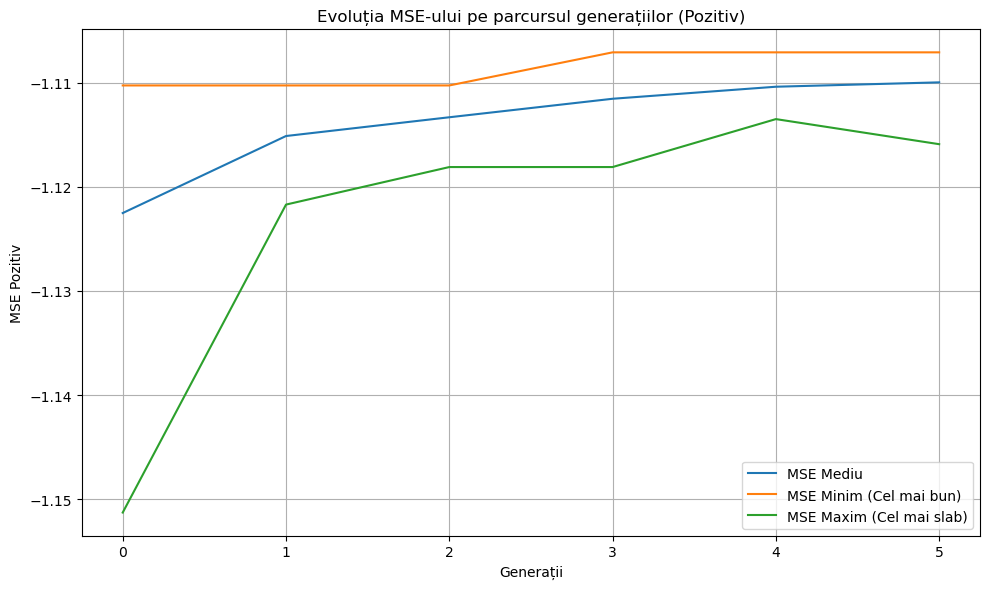

In [6]:
####Evoluția fitness-ului


import matplotlib.pyplot as plt

# Extragerea datelor din logbook
gen = logbook.select("gen")
avg_fitness = logbook.select("avg")
min_fitness = logbook.select("min")
max_fitness = logbook.select("max")

# Inversăm semnul pentru a avea MSE pozitiv
avg_mse = [-val for val in avg_fitness]
min_mse = [-val for val in min_fitness]
max_mse = [-val for val in max_fitness]

# Plot evoluția MSE-ului pozitiv
plt.figure(figsize=(10, 6))
plt.plot(gen, avg_mse, label='MSE Mediu')
plt.plot(gen, min_mse, label='MSE Minim (Cel mai bun)')
plt.plot(gen, max_mse, label='MSE Maxim (Cel mai slab)')

plt.xlabel("Generații")
plt.ylabel("MSE Pozitiv")
plt.title("Evoluția MSE-ului pe parcursul generațiilor (Pozitiv)")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


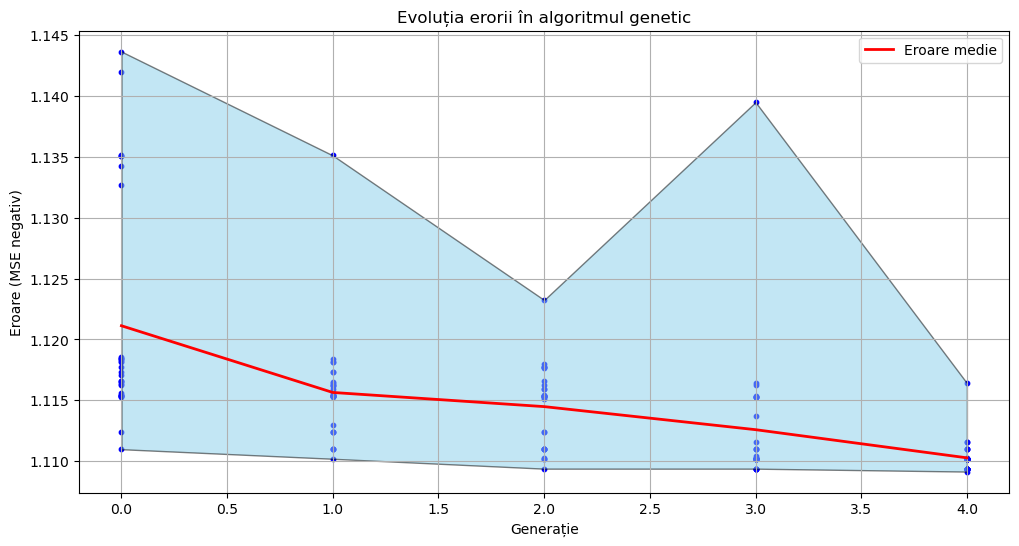


Best Hyperparameters found by Genetic Algorithm:
{'n_estimators': 100, 'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt'}

Test MSE of best model: 1.1618


In [2]:
import pandas as pd
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from deap import base, creator, tools, algorithms

warnings.filterwarnings("ignore")

# === 1. Load dataset ===
data = pd.read_csv("ev_charging_patterns_data_encoded.csv")
X = pd.get_dummies(data.drop('Charging Duration (hours)', axis=1))
y = data['Charging Duration (hours)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 2. Define search space ===
n_estimators_choices = [50, 100, 200]
max_depth_choices = [None, 10, 20, 30]
min_samples_split_choices = [2, 5, 10]
min_samples_leaf_choices = [1, 2, 4]
max_features_choices = ['sqrt', 'log2', None]

max_depth_map = {v: i for i, v in enumerate(max_depth_choices)}
max_features_map = {v: i for i, v in enumerate(max_features_choices)}
rev_max_depth_map = {i: v for v, i in max_depth_map.items()}
rev_max_features_map = {i: v for v, i in max_features_map.items()}

# === 3. Setup DEAP ===
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_n_estimators", random.randrange, len(n_estimators_choices))
toolbox.register("attr_max_depth", random.randrange, len(max_depth_choices))
toolbox.register("attr_min_samples_split", random.randrange, len(min_samples_split_choices))
toolbox.register("attr_min_samples_leaf", random.randrange, len(min_samples_leaf_choices))
toolbox.register("attr_max_features", random.randrange, len(max_features_choices))

toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_n_estimators,
                  toolbox.attr_max_depth,
                  toolbox.attr_min_samples_split,
                  toolbox.attr_min_samples_leaf,
                  toolbox.attr_max_features), n=1)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# === 4. Fitness function ===
def eval_rf(individual):
    n_estimators = n_estimators_choices[individual[0]]
    max_depth = rev_max_depth_map[individual[1]]
    min_samples_split = min_samples_split_choices[individual[2]]
    min_samples_leaf = min_samples_leaf_choices[individual[3]]
    max_features = rev_max_features_map[individual[4]]

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return (-np.mean(scores),)

toolbox.register("evaluate", eval_rf)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=[0]*5,
                 up=[len(n_estimators_choices)-1,
                     len(max_depth_choices)-1,
                     len(min_samples_split_choices)-1,
                     len(min_samples_leaf_choices)-1,
                     len(max_features_choices)-1],
                 indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# === 5. Run Genetic Algorithm and record errors ===
population = toolbox.population(n=30)
NGEN = 5
HALL_OF_FAME = tools.HallOfFame(1)

all_errors = []

for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    
    fits = list(map(toolbox.evaluate, offspring))
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit

    # Save errors for this generation
    generation_errors = [ind.fitness.values[0] for ind in offspring]
    all_errors.append(generation_errors)

    # Select next generation
    population = toolbox.select(offspring, k=len(population))
    HALL_OF_FAME.update(population)

# === 6. Plot error evolution ===
all_errors = np.array(all_errors)

mean_errors = all_errors.mean(axis=1)
min_errors = all_errors.min(axis=1)
max_errors = all_errors.max(axis=1)

plt.figure(figsize=(12, 6))

# Puncte albastre: toate erorile
for gen in range(NGEN):
    plt.scatter([gen]*all_errors.shape[1], all_errors[gen], color='blue', s=10)

# Linie roșie: media
plt.plot(range(NGEN), mean_errors, color='red', linewidth=2, label='Eroare medie')

# Umbrire: interval minim-maxim
plt.fill_between(range(NGEN), min_errors, max_errors, color='skyblue', alpha=0.5, edgecolor='black', linewidth=1)

plt.xlabel('Generație')
plt.ylabel('Eroare (MSE negativ)')
plt.title('Evoluția erorii în algoritmul genetic')
plt.legend()
plt.grid(True)
plt.show()

# === 7. Train & Evaluate best model ===
best_individual = HALL_OF_FAME[0]
best_params = {
    'n_estimators': n_estimators_choices[best_individual[0]],
    'max_depth': rev_max_depth_map[best_individual[1]],
    'min_samples_split': min_samples_split_choices[best_individual[2]],
    'min_samples_leaf': min_samples_leaf_choices[best_individual[3]],
    'max_features': rev_max_features_map[best_individual[4]]
}

print("\nBest Hyperparameters found by Genetic Algorithm:")
print(best_params)

final_model = RandomForestRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)
preds = final_model.predict(X_test)
mse = mean_squared_error(y_test, preds)

print(f"\nTest MSE of best model: {mse:.4f}")


In [1]:
print("1")


1


In [11]:
# --- Importăm librăriile ---
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from geneticalgorithm import geneticalgorithm as ga

# --- Încărcăm datele ---
df =pd.read_csv("ev_charging_patterns_scaled.csv") # actualizează calea dacă e nevoie

# --- Pregătim datele ---
target = 'Energy Consumed (kWh)'
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pentru MLP scalăm datele
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Setăm timpii pentru fiecare experiment ---
timing_results = []

# --- RANDOM FOREST --- 
# Grid Search
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestRegressor(random_state=42)

start_time = time.time()
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)
grid_search_time_rf = time.time() - start_time

best_rf = grid_rf.best_estimator_

start_time = time.time()
best_rf.fit(X_train, y_train)
train_time_rf = time.time() - start_time

start_time = time.time()
y_pred_rf = best_rf.predict(X_test)
predict_time_rf = time.time() - start_time

# Genetic Algorithm
def rf_fitness(params):
    n_estimators = int(params[0])
    max_depth = int(params[1])
    min_samples_split = int(params[2])
    model = RandomForestRegressor(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        random_state=42
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_squared_error(y_test, preds)

rf_varbound = np.array([[50, 200], [5, 20], [2, 10]])
rf_algorithm_param = {
    'max_num_iteration': 20,
    'population_size': 10,
    'mutation_probability': 0.1,
    'elit_ratio': 0.01,
    'crossover_probability': 0.5,
    'parents_portion': 0.3,
    'crossover_type':'uniform',
    'max_iteration_without_improv': 5
}

start_time = time.time()
model_rf_ga = ga(function=rf_fitness, dimension=3, variable_type='int', variable_boundaries=rf_varbound, algorithm_parameters=rf_algorithm_param)
model_rf_ga.run()
ga_search_time_rf = time.time() - start_time

best_params_rf_ga = model_rf_ga.output_dict['variable']
best_rf_ga = RandomForestRegressor(
    n_estimators=int(best_params_rf_ga[0]),
    max_depth=int(best_params_rf_ga[1]),
    min_samples_split=int(best_params_rf_ga[2]),
    random_state=42
)

start_time = time.time()
best_rf_ga.fit(X_train, y_train)
train_time_rf_ga = time.time() - start_time

start_time = time.time()
y_pred_rf_ga = best_rf_ga.predict(X_test)
predict_time_rf_ga = time.time() - start_time

# --- MLP ---
# Grid Search
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,)],
    'learning_rate_init': [0.001, 0.1],
    'alpha': [0.0001, 0.01]
}
mlp = MLPRegressor(max_iter=500, random_state=42)

start_time = time.time()
grid_mlp = GridSearchCV(mlp, param_grid_mlp, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_mlp.fit(X_train_scaled, y_train)
#grid_mlp.fit(X_train, y_train)
grid_search_time_mlp = time.time() - start_time

best_mlp = grid_mlp.best_estimator_

start_time = time.time()
best_mlp.fit(X_train_scaled, y_train)
#best_mlp.fit(X_train, y_train)
train_time_mlp = time.time() - start_time

start_time = time.time()
y_pred_mlp = best_mlp.predict(X_test_scaled)
predict_time_mlp = time.time() - start_time

# Genetic Algorithm
def mlp_fitness(params):
    hidden_layer = int(params[0])
    lr_init = params[1]
    alpha = params[2]
    model = MLPRegressor(
        hidden_layer_sizes=(hidden_layer,),
        learning_rate_init=lr_init,
        alpha=alpha,
        max_iter=500,
        random_state=42
    )
    # model.fit(X_train_scaled, y_train)
    model.fit(X_train, y_train)
    preds = model.predict(X_test_scaled)
    return mean_squared_error(y_test, preds)

mlp_varbound = np.array([[50, 100], [0.001, 0.1], [0.0001, 0.01]])
mlp_algorithm_param = {
    'max_num_iteration': 20,
    'population_size': 10,
    'mutation_probability': 0.1,
    'elit_ratio': 0.01,
    'crossover_probability': 0.5,
    'parents_portion': 0.3,
    'crossover_type':'uniform',
    'max_iteration_without_improv': 5
}

start_time = time.time()
model_mlp_ga = ga(function=mlp_fitness, dimension=3, variable_type='real', variable_boundaries=mlp_varbound, algorithm_parameters=mlp_algorithm_param)
model_mlp_ga.run()
ga_search_time_mlp = time.time() - start_time

best_params_mlp_ga = model_mlp_ga.output_dict['variable']
best_mlp_ga = MLPRegressor(
    hidden_layer_sizes=(int(best_params_mlp_ga[0]),),
    learning_rate_init=best_params_mlp_ga[1],
    alpha=best_params_mlp_ga[2],
    max_iter=500,
    random_state=42
)

start_time = time.time()
best_mlp_ga.fit(X_train_scaled, y_train)
#best_mlp_ga.fit(X_train, y_train)
train_time_mlp_ga = time.time() - start_time

start_time = time.time()
y_pred_mlp_ga = best_mlp_ga.predict(X_test_scaled)
predict_time_mlp_ga = time.time() - start_time

# --- Salvăm timpii în DataFrame ---
timing_results = pd.DataFrame({
    'Model': ['RandomForest', 'RandomForest', 'MLP', 'MLP'],
    'Optimization Method': ['Grid Search', 'Genetic Algorithm', 'Grid Search', 'Genetic Algorithm'],
    'Optimization Time (s)': [grid_search_time_rf, ga_search_time_rf, grid_search_time_mlp, ga_search_time_mlp],
    'Training Time (s)': [train_time_rf, train_time_rf_ga, train_time_mlp, train_time_mlp_ga],
    'Prediction Time (s)': [predict_time_rf, predict_time_rf_ga, predict_time_mlp, predict_time_mlp_ga]
})

# --- Afișăm rezultatele ---
print(timing_results)


ValueError: could not convert string to float: 'User_599'

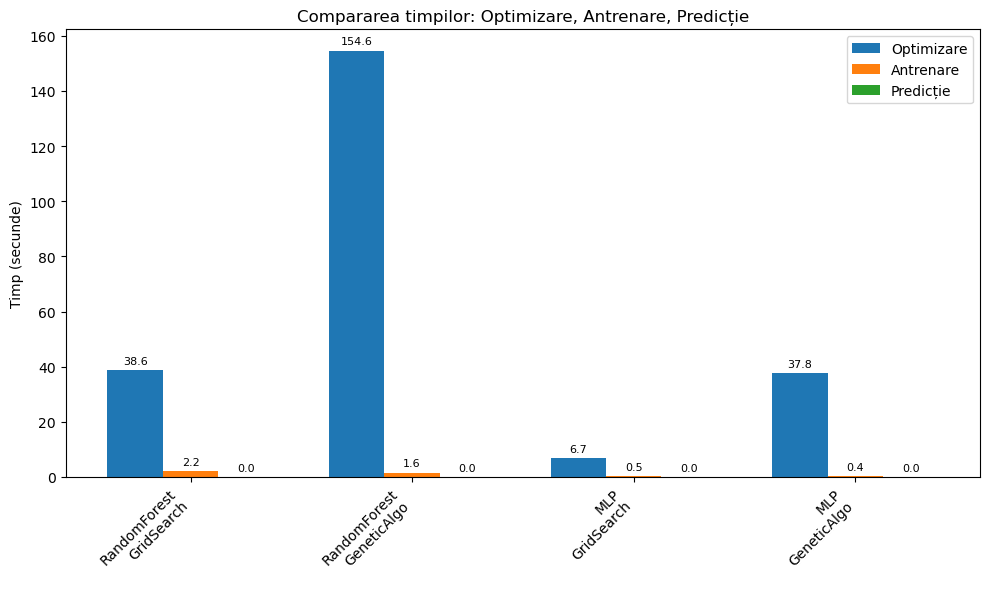

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# --- Pregătim datele ---
labels = ['RandomForest\nGridSearch', 'RandomForest\nGeneticAlgo', 
          'MLP\nGridSearch', 'MLP\nGeneticAlgo']
optimization_times = [38.64, 154.60, 6.74, 37.79]
training_times = [2.22, 1.60, 0.45, 0.43]
prediction_times = [0.039, 0.028, 0.0084, 0.0000]

x = np.arange(len(labels))  # Locațiile pe axa X
width = 0.25  # Lățimea barelor

# --- Creăm figura și axa ---
fig, ax = plt.subplots(figsize=(10,6))

# --- Desenăm fiecare grup de bare ---
rects1 = ax.bar(x - width, optimization_times, width, label='Optimizare')
rects2 = ax.bar(x, training_times, width, label='Antrenare')
rects3 = ax.bar(x + width, prediction_times, width, label='Predicție')

# --- Personalizăm axa ---
ax.set_ylabel('Timp (secunde)')
ax.set_title('Compararea timpilor: Optimizare, Antrenare, Predicție')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

# --- Adăugăm valori deasupra barelor ---
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puncte deasupra barei
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# --- Finalizare ---
fig.tight_layout()
plt.show()



=== Generația 1/5 ===
 - Eroare minimă: 1.1175
 - Eroare medie: 1.1284
 - Eroare maximă: 1.1695

=== Generația 2/5 ===
 - Eroare minimă: 1.1175
 - Eroare medie: 1.1190
 - Eroare maximă: 1.1341

=== Generația 3/5 ===
 - Eroare minimă: 1.1175
 - Eroare medie: 1.1212
 - Eroare maximă: 1.1695

=== Generația 4/5 ===
 - Eroare minimă: 1.1175
 - Eroare medie: 1.1176
 - Eroare maximă: 1.1182

=== Generația 5/5 ===
 - Eroare minimă: 1.1175
 - Eroare medie: 1.1175
 - Eroare maximă: 1.1176


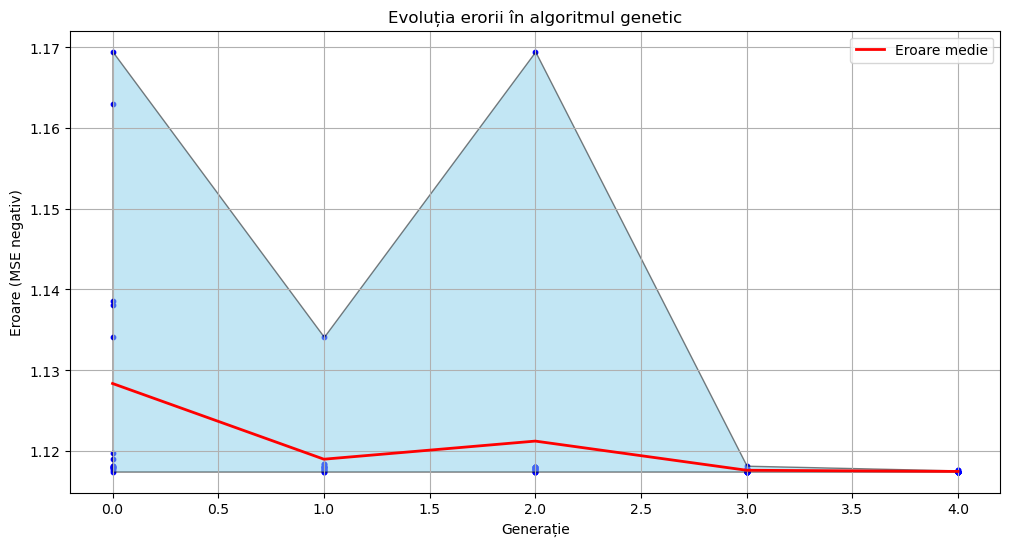


Best Hyperparameters found by Genetic Algorithm:
{'n_estimators': 100, 'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt'}

Test MSE of best model: 1.1573


In [4]:
import pandas as pd
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from deap import base, creator, tools, algorithms

warnings.filterwarnings("ignore")

# === 1. Load dataset ===
data = pd.read_csv("ev_charging_patterns_data_encoded.csv")
X = pd.get_dummies(data.drop('Charging Duration (hours)', axis=1))
y = data['Charging Duration (hours)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 2. Define search space ===
n_estimators_choices = [50, 100, 200]
max_depth_choices = [None, 10, 20, 30]
min_samples_split_choices = [2, 5, 10]
min_samples_leaf_choices = [1, 2, 4]
max_features_choices = ['sqrt', 'log2', None]

# Mapping pentru decodificare
max_depth_map = {v: i for i, v in enumerate(max_depth_choices)}
max_features_map = {v: i for i, v in enumerate(max_features_choices)}
rev_max_depth_map = {i: v for v, i in max_depth_map.items()}
rev_max_features_map = {i: v for v, i in max_features_map.items()}

# === 3. Setup DEAP ===
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_n_estimators", random.randrange, len(n_estimators_choices))
toolbox.register("attr_max_depth", random.randrange, len(max_depth_choices))
toolbox.register("attr_min_samples_split", random.randrange, len(min_samples_split_choices))
toolbox.register("attr_min_samples_leaf", random.randrange, len(min_samples_leaf_choices))
toolbox.register("attr_max_features", random.randrange, len(max_features_choices))

toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_n_estimators,
                  toolbox.attr_max_depth,
                  toolbox.attr_min_samples_split,
                  toolbox.attr_min_samples_leaf,
                  toolbox.attr_max_features), n=1)

toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# === 4. Fitness function ===
def eval_rf(individual):
    n_estimators = n_estimators_choices[individual[0]]
    max_depth = rev_max_depth_map[individual[1]]
    min_samples_split = min_samples_split_choices[individual[2]]
    min_samples_leaf = min_samples_leaf_choices[individual[3]]
    max_features = rev_max_features_map[individual[4]]

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42,
        n_jobs=-1
    )

    scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    return (-np.mean(scores),)

toolbox.register("evaluate", eval_rf)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=[0]*5,
                 up=[len(n_estimators_choices)-1,
                     len(max_depth_choices)-1,
                     len(min_samples_split_choices)-1,
                     len(min_samples_leaf_choices)-1,
                     len(max_features_choices)-1],
                 indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# === 5. Run Genetic Algorithm and record errors ===
population = toolbox.population(n=15)
NGEN = 5  # Număr de generații
HALL_OF_FAME = tools.HallOfFame(1)

# Pentru stocarea erorilor
all_errors = []

for gen in range(NGEN):
    print(f"\n=== Generația {gen+1}/{NGEN} ===")
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    
    fits = list(map(toolbox.evaluate, offspring))
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit

    generation_errors = [ind.fitness.values[0] for ind in offspring]
    all_errors.append(generation_errors)

    # Afișare evoluție fitness
    print(f" - Eroare minimă: {np.min(generation_errors):.4f}")
    print(f" - Eroare medie: {np.mean(generation_errors):.4f}")
    print(f" - Eroare maximă: {np.max(generation_errors):.4f}")

    # Select next generation
    population = toolbox.select(offspring, k=len(population))
    HALL_OF_FAME.update(population)

# === 6. Plot error evolution ===
all_errors = np.array(all_errors)

mean_errors = all_errors.mean(axis=1)
min_errors = all_errors.min(axis=1)
max_errors = all_errors.max(axis=1)

plt.figure(figsize=(12, 6))

# Toate punctele per generație
for gen in range(NGEN):
    plt.scatter([gen]*all_errors.shape[1], all_errors[gen], color='blue', s=10, label='_nolegend_')

# Linie medie
plt.plot(range(NGEN), mean_errors, color='red', linewidth=2, label='Eroare medie')

# Umbră între min și max
plt.fill_between(range(NGEN), min_errors, max_errors, color='skyblue', alpha=0.5, edgecolor='black', linewidth=1)

plt.xlabel('Generație')
plt.ylabel('Eroare (MSE negativ)')
plt.title('Evoluția erorii în algoritmul genetic')
plt.legend()
plt.grid(True)
plt.show()

# === 7. Train & Evaluate best model ===
best_individual = HALL_OF_FAME[0]
best_params = {
    'n_estimators': n_estimators_choices[best_individual[0]],
    'max_depth': rev_max_depth_map[best_individual[1]],
    'min_samples_split': min_samples_split_choices[best_individual[2]],
    'min_samples_leaf': min_samples_leaf_choices[best_individual[3]],
    'max_features': rev_max_features_map[best_individual[4]]
}

print("\nBest Hyperparameters found by Genetic Algorithm:")
print(best_params)

final_model = RandomForestRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)
preds = final_model.predict(X_test)
mse = mean_squared_error(y_test, preds)

print(f"\nTest MSE of best model: {mse:.4f}")


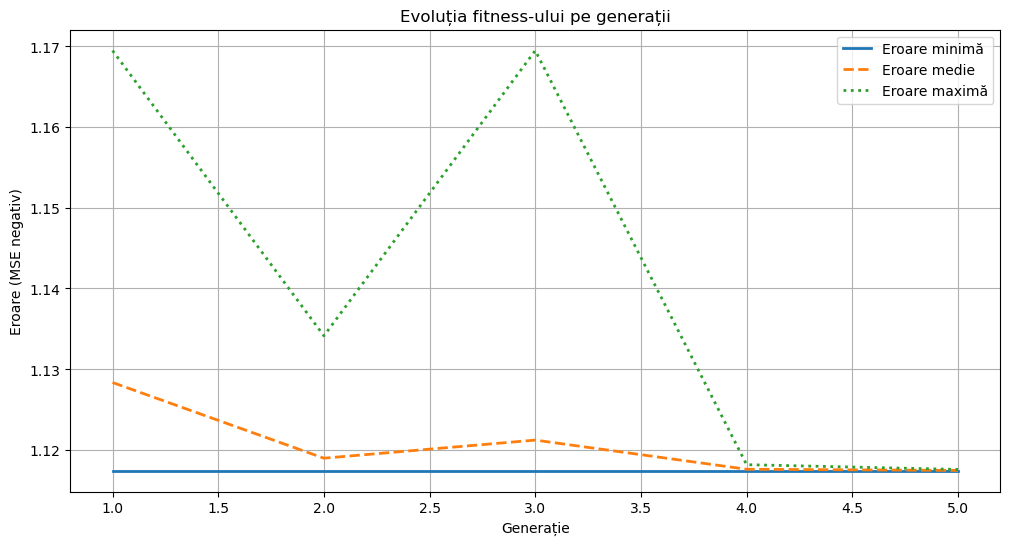

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Convertim all_errors într-un array numpy
all_errors = np.array(all_errors)

# Calculăm valori pe fiecare generație
mean_errors = all_errors.mean(axis=1)
min_errors = all_errors.min(axis=1)
max_errors = all_errors.max(axis=1)

# === Desenăm evoluția fitnessului ===
plt.figure(figsize=(12, 6))

# Linie eroare minimă
plt.plot(range(1, len(min_errors)+1), min_errors, label="Eroare minimă", linewidth=2)
# Linie eroare medie
plt.plot(range(1, len(mean_errors)+1), mean_errors, label="Eroare medie", linestyle="--", linewidth=2)
# Linie eroare maximă
plt.plot(range(1, len(max_errors)+1), max_errors, label="Eroare maximă", linestyle=":", linewidth=2)

plt.xlabel('Generație')
plt.ylabel('Eroare (MSE negativ)')
plt.title('Evoluția fitness-ului pe generații')
plt.legend()
plt.grid(True)
plt.show()


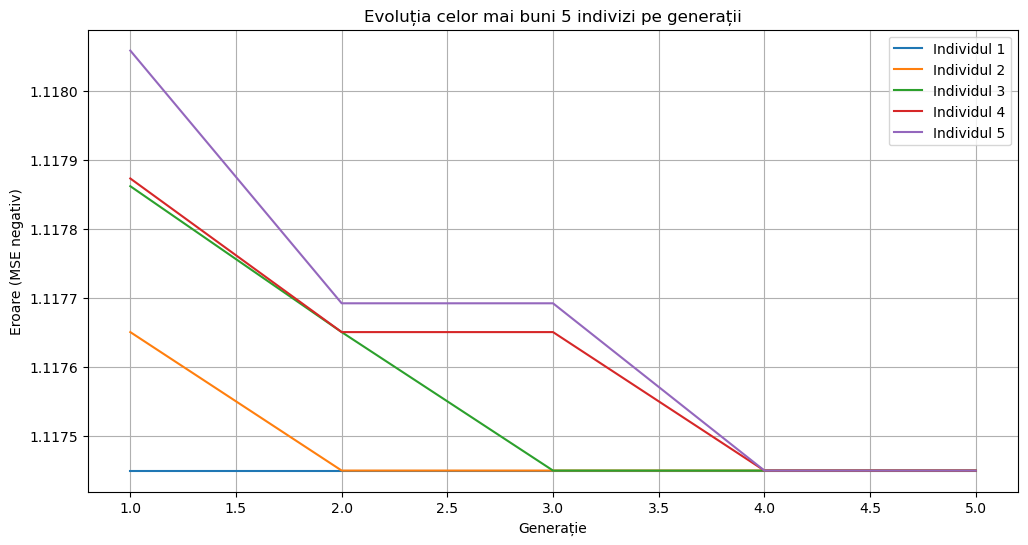

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Convertim all_errors într-un array numpy
all_errors = np.array(all_errors)

# Extragem cei mai buni 5 indivizi per generație
best_5_per_gen = np.sort(all_errors, axis=1)[:, :5]  # sortare și luăm primele 5 valori mici

# Plotăm evoluția lor
plt.figure(figsize=(12, 6))

for i in range(5):
    plt.plot(range(1, best_5_per_gen.shape[0]+1), best_5_per_gen[:, i], label=f"Individul {i+1}")

plt.xlabel('Generație')
plt.ylabel('Eroare (MSE negativ)')
plt.title('Evoluția celor mai buni 5 indivizi pe generații')
plt.legend()
plt.grid(True)
plt.show()



--- Random Forest Grid Search ---
Test MSE: 1.1404
Test R^2 Score: 0.0139
Cross-Validation R^2 Score: -0.0225
 The best solution found:                                                                           
 [187.   7.   6.]

 Objective function:
 1.1366878715170625


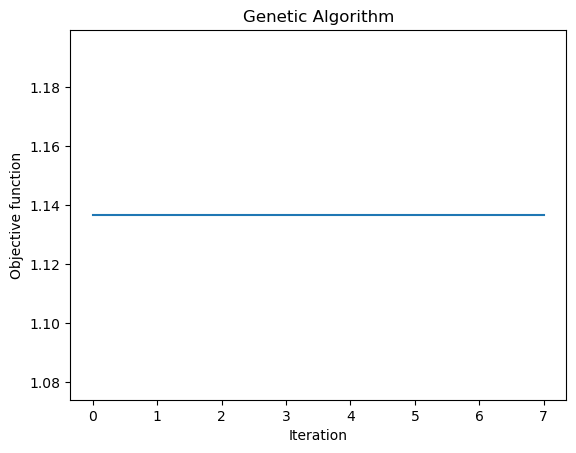


--- Random Forest Genetic Algorithm ---
Test MSE: 1.1367
Test R^2 Score: 0.0171
Cross-Validation R^2 Score: -0.0359


C:\Users\adelg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\adelg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\adelg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\adelg\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\adelg\anaconda3\Lib\site-packages\sklearn\neural_network\_multi


--- MLP Grid Search ---
Test MSE: 2.1159
Test R^2 Score: -0.8296
Cross-Validation R^2 Score: -0.7212
 The best solution found:                                                                           
 [6.78171736e+01 7.04298987e-02 8.94800807e-03]

 Objective function:
 1.6590725321627462


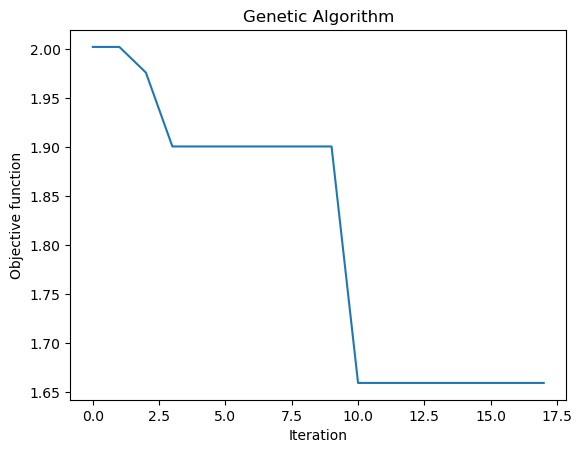


--- MLP Genetic Algorithm ---
Test MSE: 1.6591
Test R^2 Score: -0.4346
Cross-Validation R^2 Score: -1.0391

--- Timing Results ---
          Model Optimization Method  Optimization Time (s)  Training Time (s)  \
0  RandomForest         Grid Search              17.337354           0.984864   
1  RandomForest   Genetic Algorithm              87.678662           1.313845   
2           MLP         Grid Search               5.883985           2.639282   
3           MLP   Genetic Algorithm              43.447634           0.442128   

   Prediction Time (s)  
0             0.016514  
1             0.013619  
2             0.000000  
3             0.000000  


In [1]:
# --- Importăm librăriile ---
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from geneticalgorithm import geneticalgorithm as ga

# --- Încărcăm datele ---
df = pd.read_csv("ev_charging_patterns_filled.csv")

# --- Setăm coloana țintă și eliminăm coloanele irelevante ---
target = 'Charging Duration (hours)'
y = df[target]
drop_cols = ['User ID', 'Charging Station ID', 'Charging Start Time', 'Charging End Time', target]
X = df.drop(columns=drop_cols)
X = pd.get_dummies(X, drop_first=True)
# --- Împărțim în seturi de train și test ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Standardizăm datele pentru MLP ---
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Setăm timpii ---
timing_results = []

# ===================== RANDOM FOREST =====================

# --- Grid Search ---
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestRegressor(random_state=42)

start_time = time.time()
grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)
grid_search_time_rf = time.time() - start_time

best_rf = grid_rf.best_estimator_

start_time = time.time()
best_rf.fit(X_train, y_train)
train_time_rf = time.time() - start_time

start_time = time.time()
y_pred_rf = best_rf.predict(X_test)
predict_time_rf = time.time() - start_time

# --- Evaluare Grid Search RF ---
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
cv_r2_rf = cross_val_score(best_rf, X_train, y_train, cv=3, scoring='r2').mean()

print("\n--- Random Forest Grid Search ---")
print(f"Test MSE: {mse_rf:.4f}")
print(f"Test R^2 Score: {r2_rf:.4f}")
print(f"Cross-Validation R^2 Score: {cv_r2_rf:.4f}")

# --- Genetic Algorithm RF ---
def rf_fitness(params):
    model = RandomForestRegressor(
        n_estimators=int(params[0]),
        max_depth=int(params[1]),
        min_samples_split=int(params[2]),
        random_state=42
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_squared_error(y_test, preds)

rf_varbound = np.array([[50, 200], [5, 20], [2, 10]])
rf_algorithm_param = {
    'max_num_iteration': 20,
    'population_size': 10,
    'mutation_probability': 0.1,
    'elit_ratio': 0.01,
    'crossover_probability': 0.5,
    'parents_portion': 0.3,
    'crossover_type': 'uniform',
    'max_iteration_without_improv': 5
}

start_time = time.time()
model_rf_ga = ga(function=rf_fitness, dimension=3, variable_type='int',
                 variable_boundaries=rf_varbound, algorithm_parameters=rf_algorithm_param)
model_rf_ga.run()
ga_search_time_rf = time.time() - start_time

best_params_rf_ga = model_rf_ga.output_dict['variable']
best_rf_ga = RandomForestRegressor(
    n_estimators=int(best_params_rf_ga[0]),
    max_depth=int(best_params_rf_ga[1]),
    min_samples_split=int(best_params_rf_ga[2]),
    random_state=42
)

start_time = time.time()
best_rf_ga.fit(X_train, y_train)
train_time_rf_ga = time.time() - start_time

start_time = time.time()
y_pred_rf_ga = best_rf_ga.predict(X_test)
predict_time_rf_ga = time.time() - start_time

# --- Evaluare Genetic Algorithm RF ---
mse_rf_ga = mean_squared_error(y_test, y_pred_rf_ga)
r2_rf_ga = r2_score(y_test, y_pred_rf_ga)
cv_r2_rf_ga = cross_val_score(best_rf_ga, X_train, y_train, cv=3, scoring='r2').mean()

print("\n--- Random Forest Genetic Algorithm ---")
print(f"Test MSE: {mse_rf_ga:.4f}")
print(f"Test R^2 Score: {r2_rf_ga:.4f}")
print(f"Cross-Validation R^2 Score: {cv_r2_rf_ga:.4f}")

# ===================== MLP =====================

# --- Grid Search ---
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,)],
    'learning_rate_init': [0.001, 0.1],
    'alpha': [0.0001, 0.01]
}
mlp = MLPRegressor(max_iter=500, random_state=42)

start_time = time.time()
grid_mlp = GridSearchCV(mlp, param_grid_mlp, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_mlp.fit(X_train, y_train)
grid_search_time_mlp = time.time() - start_time

best_mlp = grid_mlp.best_estimator_

start_time = time.time()
best_mlp.fit(X_train, y_train)
train_time_mlp = time.time() - start_time

start_time = time.time()
y_pred_mlp = best_mlp.predict(X_test)
predict_time_mlp = time.time() - start_time

# --- Evaluare Grid Search MLP ---
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)
cv_r2_mlp = cross_val_score(best_mlp, X_train, y_train, cv=3, scoring='r2').mean()

print("\n--- MLP Grid Search ---")
print(f"Test MSE: {mse_mlp:.4f}")
print(f"Test R^2 Score: {r2_mlp:.4f}")
print(f"Cross-Validation R^2 Score: {cv_r2_mlp:.4f}")

# --- Genetic Algorithm MLP ---
def mlp_fitness(params):
    model = MLPRegressor(
        hidden_layer_sizes=(int(params[0]),),
        learning_rate_init=params[1],
        alpha=params[2],
        max_iter=500,
        random_state=42
    )
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_squared_error(y_test, preds)

mlp_varbound = np.array([[50, 100], [0.001, 0.1], [0.0001, 0.01]])
mlp_algorithm_param = {
    'max_num_iteration': 20,
    'population_size': 10,
    'mutation_probability': 0.1,
    'elit_ratio': 0.01,
    'crossover_probability': 0.5,
    'parents_portion': 0.3,
    'crossover_type': 'uniform',
    'max_iteration_without_improv': 5
}

start_time = time.time()
model_mlp_ga = ga(function=mlp_fitness, dimension=3, variable_type='real',
                  variable_boundaries=mlp_varbound, algorithm_parameters=mlp_algorithm_param)
model_mlp_ga.run()
ga_search_time_mlp = time.time() - start_time

best_params_mlp_ga = model_mlp_ga.output_dict['variable']
best_mlp_ga = MLPRegressor(
    hidden_layer_sizes=(int(best_params_mlp_ga[0]),),
    learning_rate_init=best_params_mlp_ga[1],
    alpha=best_params_mlp_ga[2],
    max_iter=500,
    random_state=42
)

start_time = time.time()
best_mlp_ga.fit(X_train, y_train)
train_time_mlp_ga = time.time() - start_time

start_time = time.time()
y_pred_mlp_ga = best_mlp_ga.predict(X_test)
predict_time_mlp_ga = time.time() - start_time

# --- Evaluare Genetic Algorithm MLP ---
mse_mlp_ga = mean_squared_error(y_test, y_pred_mlp_ga)
r2_mlp_ga = r2_score(y_test, y_pred_mlp_ga)
cv_r2_mlp_ga = cross_val_score(best_mlp_ga, X_train, y_train, cv=3, scoring='r2').mean()

print("\n--- MLP Genetic Algorithm ---")
print(f"Test MSE: {mse_mlp_ga:.4f}")
print(f"Test R^2 Score: {r2_mlp_ga:.4f}")
print(f"Cross-Validation R^2 Score: {cv_r2_mlp_ga:.4f}")

# ===================== TIMPI =====================

timing_results = pd.DataFrame({
    'Model': ['RandomForest', 'RandomForest', 'MLP', 'MLP'],
    'Optimization Method': ['Grid Search', 'Genetic Algorithm', 'Grid Search', 'Genetic Algorithm'],
    'Optimization Time (s)': [grid_search_time_rf, ga_search_time_rf, grid_search_time_mlp, ga_search_time_mlp],
    'Training Time (s)': [train_time_rf, train_time_rf_ga, train_time_mlp, train_time_mlp_ga],
    'Prediction Time (s)': [predict_time_rf, predict_time_rf_ga, predict_time_mlp, predict_time_mlp_ga]
})

print("\n--- Timing Results ---")
print(timing_results)


In [15]:
X.head()

,Battery Capacity (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),...,Charging Station Location_Houston,Charging Station Location_Los Angeles,Charging Station Location_New York,Charging Station Location_San Francisco,Charger Type_DC Fast Charger,Charger Type_Level 1,Charger Type_Level 2,User Type_Casual Driver,User Type_Commuter,User Type_Long-Distance Traveler
0,108.463007,-1.582085,0.763071,-0.880549,2.0,1.0,-0.821044,0.642984,1.670063,0.855572,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,100.000000,0.814865,0.344708,-0.132395,0.0,0.0,-1.621201,0.557731,-0.495585,-0.064251,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,75.000000,0.172798,0.112934,1.220378,0.0,3.0,-1.756717,-0.305959,-0.976632,0.387061,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,50.000000,-0.945610,0.506234,-0.885339,2.0,5.0,1.412424,1.433910,0.548104,1.554927,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,50.000000,-0.235342,-1.154137,-1.152824,0.0,5.0,0.213128,-0.667549,0.596838,-1.557967,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
